<ol>
    <h1><li>Gatheing data </li><h1>
    </ol>
    

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 

<ol>
    <b>a.Twitter archive file

In [3]:
#Read CSV file of twitter archive
Twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None



<b>b. Tweet image prediction



In [5]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<b>c.Twitter API

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [59]:
df_api=[]
with open('tweet-json.txt') as file:
    for l in file:
         df_api.append(json.loads(l))

In [60]:
df_api[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [61]:
#copy the dataframe to new dataframe with specific Columns 
tweet_api=pd.DataFrame(df_api, columns =['id',
                                        'retweet_count'
                                         ,'favorite_count'])

In [62]:
tweet_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [63]:
#save into csv file 
tweet_api.to_csv('tweet_api.csv',index=False )

In [64]:
tweet=pd.read_csv('tweet_api.csv')
tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [65]:
tweet_api=tweet_api.rename(columns={'id':'tweet_id'})

In [130]:
tweet.shape

(2354, 3)

<h1>2. Assessing Data</h1>

<h4>in this part will assess data visually and programmatically for quality and tidiness issue

In [66]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [67]:
Twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [68]:
Twitter_archive.rating_numerator.value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [69]:
#check the number of rating more then 10
Twitter_archive[Twitter_archive.rating_numerator>10].count()[0]

1455

In [70]:
#see the number of rating more then 10 with id
Twitter_archive[Twitter_archive.rating_numerator>10].tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2307    666826780179869698
2324    666421158376562688
2329    666373753744588802
2336    666273097616637952
2339    666102155909144576
Name: tweet_id, Length: 1455, dtype: int64

In [71]:
Twitter_archive.loc[0, 'text']


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [72]:
#check for duplicate on tweet id
sum(Twitter_archive['tweet_id'].duplicated())

0

In [73]:
Twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

<h3> tweet image 

In [74]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
1223,744709971296780288,https://pbs.twimg.com/media/ClW9w7mWEAEFN1k.jpg,1,Shetland_sheepdog,0.234431,True,Samoyed,0.114876,True,collie,0.086614,True
1357,760641137271070720,https://pbs.twimg.com/media/Co5XExUWgAAL5L_.jpg,1,axolotl,0.132695,False,killer_whale,0.131113,False,sea_lion,0.069652,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
735,687096057537363968,https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg,1,Labrador_retriever,0.417107,True,Chesapeake_Bay_retriever,0.341730,True,German_short-haired_pointer,0.177702,True
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
1859,842115215311396866,https://pbs.twimg.com/media/C6_LTCZWoAAKm_O.jpg,1,chow,0.293493,True,Newfoundland,0.181336,True,schipperke,0.125152,True
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True


<h3>Twitter api data

In [78]:
tweet_api.sample(10)

,tweet_id,retweet_count,favorite_count
456,818145370475810820,3014,13671
978,749774190421639168,1493,5114
947,752309394570878976,18963,0
1609,685325112850124800,4535,10471
1077,739238157791694849,52360,75163
1274,709158332880297985,470,2236
60,880221127280381952,4436,27640
1697,680970795137544192,749,2665
844,766313316352462849,2166,7493
473,816091915477250048,2500,9927


In [79]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<h3>Tidiness 

<ol>
    <li>Twitter archive have a 4 column about dogs type </li>
    <li>In image prediction the img_num column is useless </li>
   

<h3>Quality 

<ol>
    <li>Invallid timestamp data type string insted of datatome </li>
     <li>Invallid tweet_id data type should be an integer</li>
     <li>same name of doge is less then 2 letter and have invalid names </li>
     <li>1455 rating numerators is above 10</li>
     <li>There should be a rating_numerator column with a float type that is correctly extracted.</li>
     <li>Columns with missing data show 'None' for name and stages</li>
     <li>There are invalid values in the numerator and denominator columns.</li>
     <li>Delete columns that won't be used for analysis
</li>

<h3>General </h3>
all data should be merged together into one data frame

<h1>3.Cleaning

In [80]:
#copy dataframes
Twitter_archive_clean =Twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_api_clean = tweet_api.copy()


<b> Define </b><br>
    merge all data into one data frame

<b>code

In [81]:
Twitter_archive_clean = pd.merge(Twitter_archive_clean,
                                 tweet_api_clean, on='tweet_id', how='left')


In [82]:
Twitter_archive_clean = pd.merge(Twitter_archive_clean,image_prediction_clean, on='tweet_id', how='left')


<b>Test

In [83]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [84]:
Twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


<h3>Cleaning Quality issues 

not all of Quality issues will be clean such as data will not be used to analyse .

<b>Define</b><br>
    Invallid timestamp data type string insted of datatime

<b>code

In [85]:
Twitter_archive_clean['timestamp'] = pd.to_datetime((Twitter_archive_clean.timestamp))


<b>Test

In [86]:
Twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
retweet_count                             float64
favorite_count                            float64
jpg_url                                    object


<b>Define

Invallid tweet_id data type should be an integer

In [87]:
Twitter_archive_clean['tweet_id'] = Twitter_archive_clean['tweet_id'].astype(str)

                                                        
                                                        
                                                        

<b>Test

In [88]:
Twitter_archive_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
retweet_count                             float64
favorite_count                            float64
jpg_url                                    object


<b>Define </b><br>
Clean data by dropping duplicates row and not meaningful columns.

<b>Code
    

In [89]:
# Delete the retweets
Twitter_archive_clean = Twitter_archive_clean[pd.isnull(Twitter_archive_clean.retweeted_status_id)]


In [90]:
# Delete columns that we don't need anymore
del Twitter_archive_clean['retweeted_status_id']
del Twitter_archive_clean['retweeted_status_user_id']
del Twitter_archive_clean['retweeted_status_timestamp']

In [91]:
# Delete duplicated tweet_id
Twitter_archive_clean = Twitter_archive_clean.drop_duplicates()


In [92]:
# Delete tweets with no pictures
Twitter_archive_clean = Twitter_archive_clean.dropna(subset = ['jpg_url'])

<b>Test

In [93]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

<b>Define</b><br>
same name of doge is less then 2 letter and have invalid names

<b>Code

In [94]:
Twitter_archive_clean[~Twitter_archive_clean.name.str.istitle()].name.unique()


array(['such', 'a', 'quite', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'not', 'his', 'an', 'just', 'getting', 'this',
       'unacceptable', 'all', 'infuriating', 'CeCe', 'the', 'actually',
       'by', 'officially', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [95]:
Twitter_archive_clean=Twitter_archive_clean.replace(['such', 'a', 'quite', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'not', 'his', 'an', 'just', 'getting', 'this',
       'unacceptable', 'all', 'infuriating', 'CeCe', 'the', 'actually',
       'by', 'officially', 'light', 'space', 'JD', 'DayZ','None'],np.nan)
                                                          

<b>Test

In [96]:
Twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


<b>Define</b><br>
There should be a rating_numerator column with a float type that is correctly extracted.

<b>Code

In [97]:


# Convert the rating_numerator column to a float
Twitter_archive_clean['rating_numerator'] = Twitter_archive_clean['rating_numerator'].astype(float)




<b>Test

In [98]:
# Check the data type of the rating_numerator column again
print(Twitter_archive_clean['rating_numerator'].dtype)

float64


<b>Define</b><br>
Twitter archive have a 4 column about dogs type combine them together in one column 

<b>Code

In [99]:
# Combine the dog stage columns into a single column called 'dog_stage'
Twitter_archive_clean['dog_stage'] = Twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Drop the doggo, floofer, pupper, and puppo columns
Twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


In [107]:
Twitter_archive_clean.loc[Twitter_archive_clean.dog_stage == 'doggo pupper  ', 'dog_stage'] = 'doggo, pupper'
Twitter_archive_clean.loc[Twitter_archive_clean.dog_stage == 'doggo puppo', 'dog_stage'] = 'doggo, puppo'
Twitter_archive_clean.loc[Twitter_archive_clean.dog_stage == 'doggo floofer', 'dog_stage'] = 'doggo, floofer'


In [108]:
Twitter_archive_clean['dog_stage'].value_counts()

                  1688
pupper             203
doggo               63
puppo               22
doggo pupper         9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

<b>Test

In [100]:
list(Twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

<b>Define

<h1>Storing and Visualizing Data

In [60]:
#Store the clean DataFrame in a CSV file
Twitter_archive_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<h3>1.what is the most popular dog stage?

<AxesSubplot:title={'center':'Popular by stages of dogs'}, xlabel='dog_stage'>

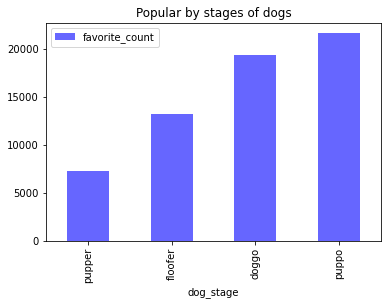

In [121]:
df_dog = Twitter_archive_clean[Twitter_archive_clean["dog_stage"].isnull()==False]

df_stages = Twitter_archive_clean.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
Popular_stages_dogs= pd.DataFrame(df_stages.groupby('dog_stage').favorite_count.mean().sort_values())
Popular_stages_dogs['dog_stage'] = Popular_stages_dogs.index
Popular_stages_dogs.plot(x="dog_stage",y='favorite_count',kind='bar',title="Popular by stages of dogs",color='b', alpha=0.6)


the most Popular dogs is poppo

In [92]:
pip install -U statsmodels

     |████████████████████████████████| 9.2 MB 2.4 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [123]:
import seaborn as sns


<h3>2.Over time, comparing the number of retweets and favorites tweets.

/Users/alya/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


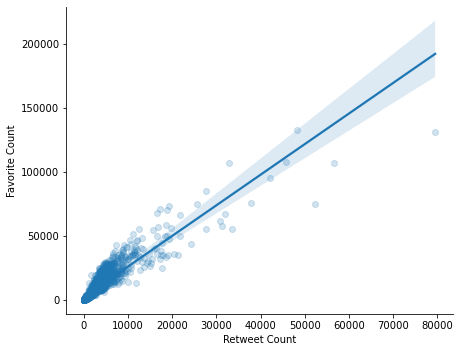

In [124]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=Twitter_archive_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

The number of favorites is positively correlated with the number of retweets.


<h3>3.among all tweets, this is the most popular rating

(0.0, 500.0)

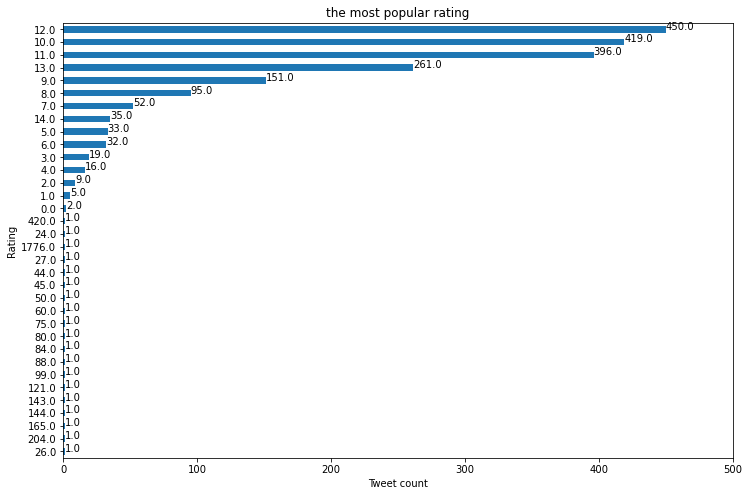

In [129]:

com_rate = Twitter_archive_clean.groupby('rating_numerator').tweet_id.count().sort_values(ascending=True)

com_rate.plot(kind='barh', figsize=[12, 8])

for index, value in enumerate(com_rate):
    plt.text(value, index, float(value))
    
plt.title('the most popular rating')
plt.xlabel('Tweet count')
plt.ylabel('Rating')
plt.xlim(0, 500)



12 is th most used rating number